This tutorial shows how to use the public point-source data for a time dependent point-source analysis. The time fit is performed by the expectation maximization (EM) algorithm.   

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from skyllh.analyses.i3.publicdata_ps.time_dependent_ps import (
    create_analysis,
    run_gamma_scan_single_flare,
    run_trials_with_em,
)
from skyllh.core.random import RandomStateService
from skyllh.datasets.i3.PublicData_10y_ps import create_dataset_collection
from skyllh.physics.source_model import PointLikeSource

In [2]:
dsc = create_dataset_collection(
    base_path="/home/mwolf/projects/publicdata_ps/")
datasets = dsc.get_datasets(["IC86_II-VII"])

In [3]:
source = PointLikeSource(
    ra=np.deg2rad(77.3581851), 
    dec=np.deg2rad(5.69314828))

In [4]:
ana = create_analysis(
    datasets=datasets, 
    source=source, 
    refplflux_gamma=2.0, 
    gauss={"mu":57000, "sigma": 65})

100%|██████████| 44/44 [00:00<00:00, 7068.96it/s]


In [5]:
def run_em_on_unblinded_flare(ana, remove_time=None):
    """Run the EM on unblinded data. Similar to the original analysis, 
    remove the alert event.

    Parameters
    ----------
    remove_time : float
        Time of the event that should be removed.
        In the case of the TXS analysis: remove_time=58018.8711856.

    Returns
    -------
    results : instance of numpy structured ndarray
        The numpy structured ndarray with fields

        gamma : float
            The spectral index value.
        mu : float
            The determined mean value of the gauss curve.
        sigma : float
            The determoned standard deviation of the gauss curve.
        ns_em : float
            The scaling factor of the flare.
    """
    rss = RandomStateService(seed=1)
    ana.unblind(rss=rss)
    
    results = run_gamma_scan_single_flare(
        ana=ana, 
        remove_time=remove_time)
    
    return results


In [6]:
em_results = run_em_on_unblinded_flare(ana=ana, remove_time=58018.8711856)

In [7]:
print(em_results)

[(1.  , 56973.23708581,  31.3563052 , 1.79515876e+00)
 (1.08, 56973.54484189,  31.14357769, 1.90863994e+00)
 (1.16, 56973.83307677,  30.87665456, 2.03884445e+00)
 (1.24, 56974.08415341,  30.55533666, 2.18552345e+00)
 (1.32, 56974.28746397,  30.18832367, 2.34723234e+00)
 (1.4 , 56974.43460415,  29.79011038, 2.52276533e+00)
 (1.48, 56974.52115046,  29.38462682, 2.70882968e+00)
 (1.56, 56974.54623867,  28.99947969, 2.90061350e+00)
 (1.64, 56974.51341733,  28.66214757, 3.09018079e+00)
 (1.72, 56974.43221152,  28.37640449, 3.27745255e+00)
 (1.8 , 56974.30631703,  28.15416286, 3.45507477e+00)
 (1.88, 56974.14586177,  27.99657819, 3.61748184e+00)
 (1.96, 56973.9490699 ,  27.88953708, 3.76387819e+00)
 (2.04, 56973.72989754,  27.82971047, 3.88935168e+00)
 (2.12, 56973.48898241,  27.81453748, 3.98970729e+00)
 (2.2 , 56973.22996936,  27.83708787, 4.06122538e+00)
 (2.28, 56972.95267253,  27.89163812, 4.10080447e+00)
 (2.36, 56972.6530535 ,  27.97159094, 4.10619138e+00)
 (2.44, 56972.33490857,  28.

Run backgroud trials, i.e. ``mean_n_sig=0``

In [8]:
trials = run_trials_with_em(ana=ana, n_trials=100)

In [10]:
print(len(trials))
print(trials)

100
[(1, 0., 0, 2., -1., -1., -1., -1., 10.57881075,  1.93770601, 1.57171023e+00, 2.0212895 , 2. , 57868.68666897,   1.        )
 (1, 0., 0, 2., -1., -1., -1., -1., 11.16457887,  1.82272228, 1.53523439e+00, 1.79404364, 2. , 56434.17657502,   1.42796591)
 (1, 0., 0, 2., -1., -1., -1., -1., 15.04297941,  3.01129945, 2.43597624e+00, 2.40368215, 3. , 57470.8510858 ,   1.        )
 (1, 0., 0, 2., -1., -1., -1., -1.,  5.16075779,  0.97800975, 9.40510584e-01, 2.84709034, 2.8, 57621.82256898,   1.        )
 (1, 0., 0, 2., -1., -1., -1., -1.,  9.70279032,  1.40844219, 1.27362046e+00, 1.8902597 , 2.4, 56963.98184302,   1.        )
 (1, 0., 0, 2., -1., -1., -1., -1.,  8.54088933,  5.12755634, 7.12500344e-16, 4.47638836, 5. , 56547.14600954,  11.72460101)
 (1, 0., 0, 2., -1., -1., -1., -1.,  7.10243676,  1.85858586, 1.52493429e+00, 5.        , 4. , 56825.48385994,   1.        )
 (1, 0., 0, 2., -1., -1., -1., -1.,  6.71955446,  1.07266425, 1.01368051e+00, 3.54169938, 5. , 56836.31034136,   1.      

(array([ 3., 18., 28., 29., 10.,  4.,  3.,  4.,  0.,  1.]),
 array([ 2.7115307 ,  4.88748774,  7.06344479,  9.23940183, 11.41535887,
        13.59131591, 15.76727296, 17.94323   , 20.11918704, 22.29514408,
        24.47110113]),
 <BarContainer object of 10 artists>)

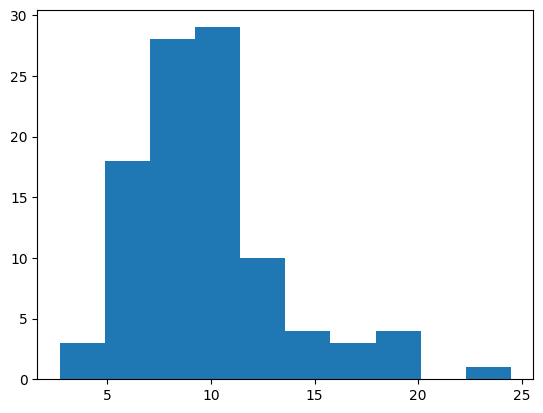

In [12]:
plt.hist(trials["ts"])